In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy as sy
import scipy.stats
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from scipy import ndimage
import PIL.Image
import math
import os
import string

import sys
path=r'C:\Users\31649\Documents\genome analysis\genome_topology\functions'
sys.path.append(path)


from statistical_analysis import correlate
from statistical_analysis import comparison_distributions
from math_tools import lin_fit
from math_tools import line
from plotting_tools import set_layout
from plotting_tools import save_figures
from matrix_analysis import Select_entangled_fraction
from matrix_analysis import length_L_pattern

In [2]:
def read_topology_matrix(file):
    
    #open file
    if file.endswith('.feather'):
        df = pd.read_feather(file)
    elif file.endswith('.csv'):
        df = pd.read_csv(file)
        
        
    size = df['Index1'].max() + 1


    #compose matrix and fill in 2D array
    new_matrix = np.ones((size, size))
    
    for row in df.iterrows():
        x = int(row[1]['Index1'])
        y = int(row[1]['Index2'])
        value = row[1]['Values']
        new_matrix[x, y] = value
    
        if value == 3.:
            new_matrix[y, x] = 2.
        elif value == 5.:
            new_matrix[y, x] = 6.
    
        elif value == 6.:
            new_matrix[y, x] = 5.
        else:
            new_matrix[y, x] = value
    
    return new_matrix

In [55]:
resolution = '160'
thresh = 0.99
n_segments=8
path_matrices = f'results counts/matrices/local matrices/{resolution}/{n_segments} segments'
samples = ['Control1', 'Control2', 'Treated1', 'Treated2']

chromosomes = [str(t) for t in range(1,23)]
chromosomes.append('X')

In [56]:
chrom = chromosomes[0]
sample = 'Treated1'
t = 0

In [57]:
matrix = read_topology_matrix(f'{path_matrices}/{chrom}_{sample}_{t}.feather')

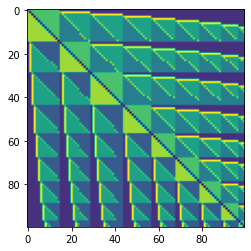

In [58]:
plt.imshow(matrix[:100, :100])

In [59]:
cut_matrix = matrix[:100, :100]
PIL.Image.fromarray(cut_matrix.astype(float)).save("{}_{}100.tif".format(path_matrices,t))